In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
df = pd.read_csv('toyota.csv')

In [4]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


In [6]:
df = df.rename(columns={'model': 'jenis'})

<Axes: >

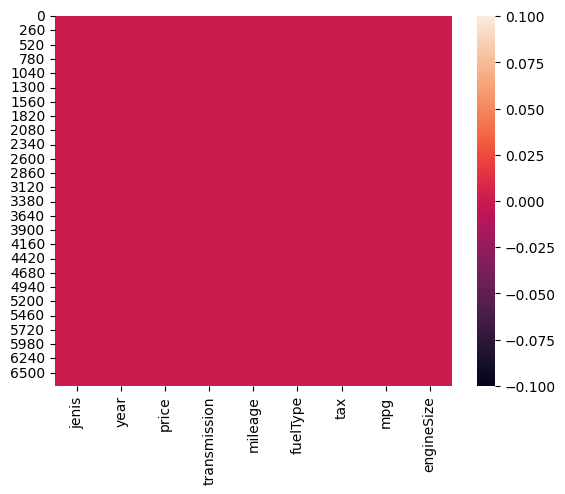

In [7]:
sns.heatmap(df.isnull())

In [8]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000
mean,2016.748145,12522.391066,22857.413921,94.697240,63.042223,1.471297
std,2.204062,6345.017587,19125.464147,73.880776,15.836710,0.436159
min,1998.000000,850.000000,2.000000,0.000000,2.800000,0.000000
25%,2016.000000,8290.000000,9446.000000,0.000000,55.400000,1.000000
50%,2017.000000,10795.000000,18513.000000,135.000000,62.800000,1.500000
75%,2018.000000,14995.000000,31063.750000,145.000000,69.000000,1.800000
max,2020.000000,59995.000000,174419.000000,565.000000,235.000000,4.500000


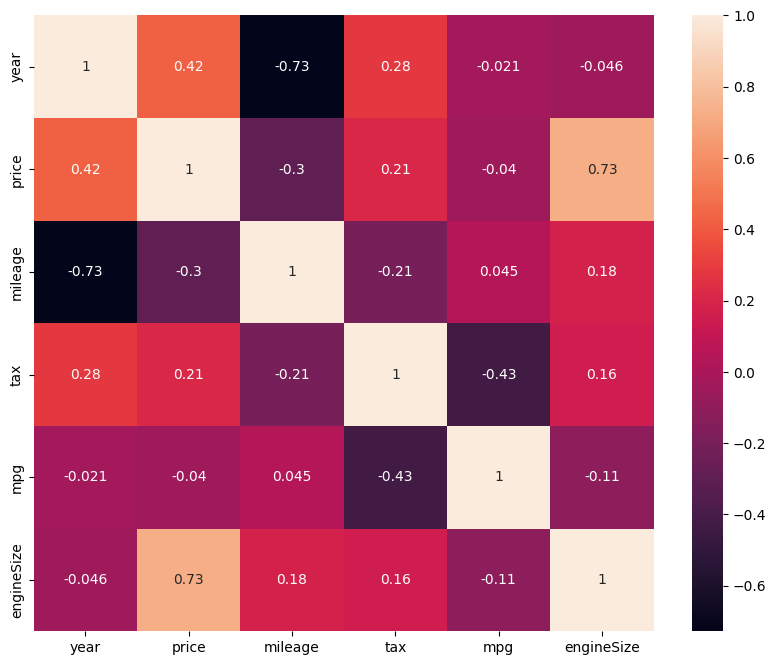

In [9]:
# Assuming df is your original DataFrame
# Select numeric columns (excluding non-numeric columns)
numeric_df = df.select_dtypes(include=[np.number])

# Handle missing values (replace with 0 or impute as needed)
numeric_df = numeric_df.fillna(0)  # Replace NaN with 0

# Calculate the correlation matrix for the numeric columns
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.show()


In [10]:
models = df.groupby('jenis').count()[['tax']].sort_values(by='tax',ascending=True).reset_index()
models = models.rename(columns={'tax':'numberOfCars'})

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, ' Verso-S'),
  Text(1, 0, ' Urban Cruiser'),
  Text(2, 0, ' IQ'),
  Text(3, 0, ' Camry'),
  Text(4, 0, ' Supra'),
  Text(5, 0, ' PROACE VERSO'),
  Text(6, 0, ' Land Cruiser'),
  Text(7, 0, ' GT86'),
  Text(8, 0, ' Hilux'),
  Text(9, 0, ' Verso'),
  Text(10, 0, ' Avensis'),
  Text(11, 0, ' Prius'),
  Text(12, 0, ' Corolla'),
  Text(13, 0, ' RAV4'),
  Text(14, 0, ' C-HR'),
  Text(15, 0, ' Auris'),
  Text(16, 0, ' Aygo'),
  Text(17, 0, ' Yaris')])

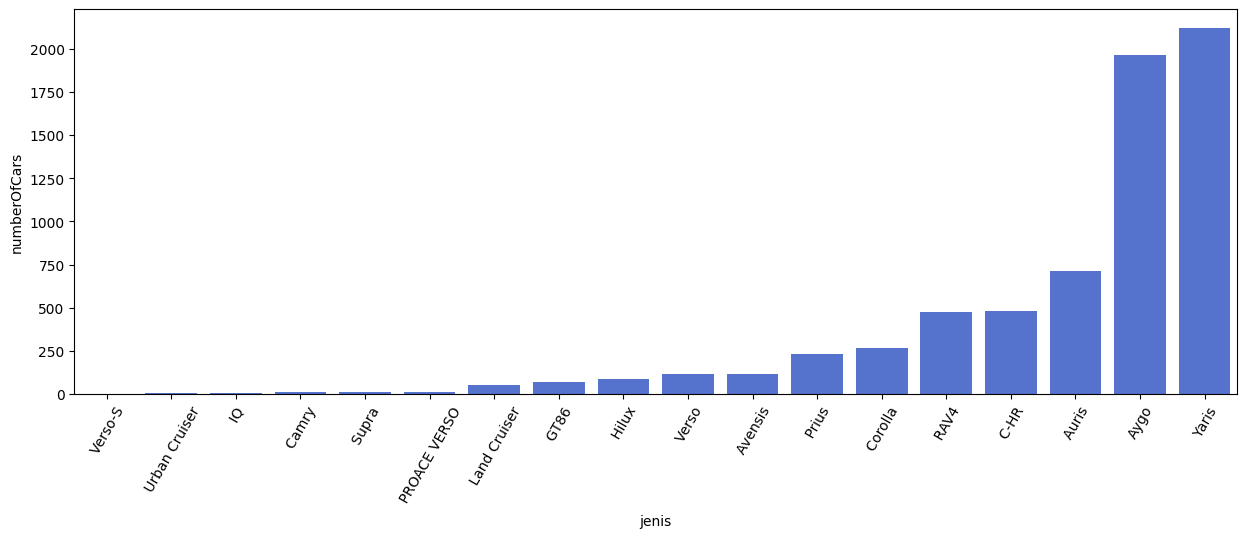

In [11]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x=models['jenis'], y=models['numberOfCars'], color='royalblue')
plt.xticks(rotation=60)

In [12]:
engine = df.groupby('engineSize').count()[['tax']].sort_values(by='tax').reset_index()
engine = engine.rename(columns={'tax':'count'})

<Axes: xlabel='engineSize', ylabel='count'>

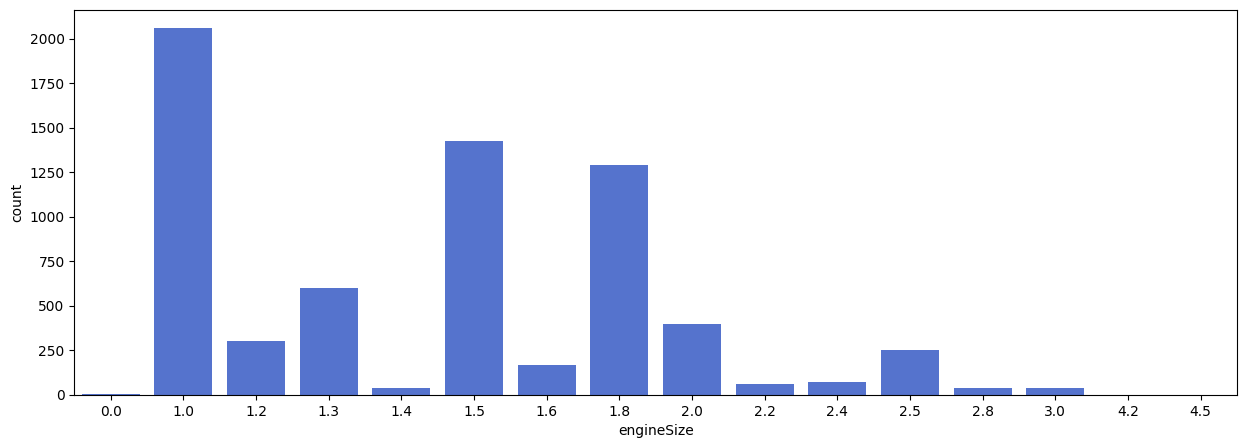

In [13]:
plt.figure(figsize=(15,5))
sns.barplot(x=engine['engineSize'], y=engine['count'], color='royalblue')

C:\Users\roikh\AppData\Local\Temp\ipykernel_22972\148899218.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['mileage'])


<Axes: xlabel='mileage', ylabel='Density'>

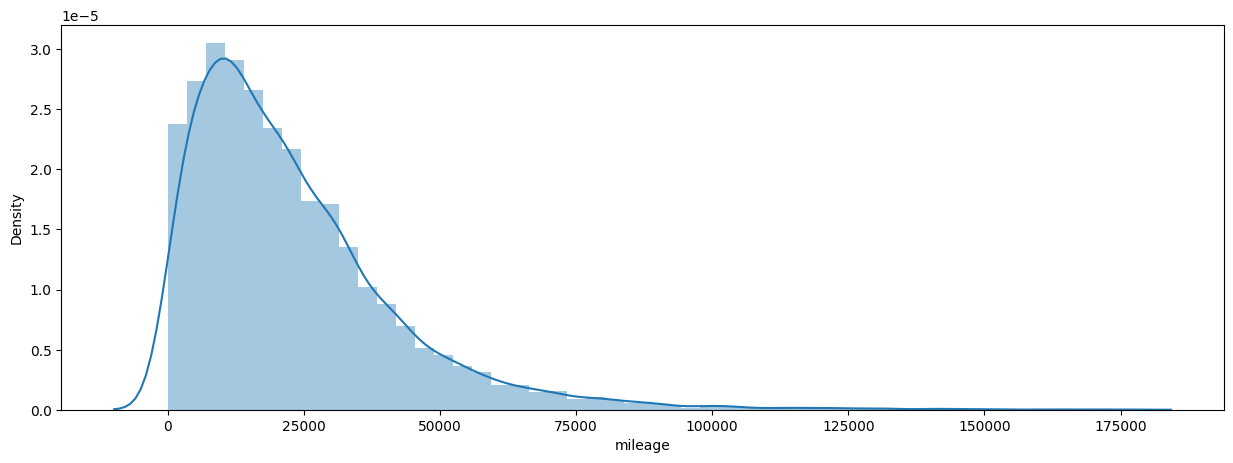

In [14]:
plt.figure(figsize=(15,5))
sns.distplot(df['mileage'])

C:\Users\roikh\AppData\Local\Temp\ipykernel_22972\3048279456.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

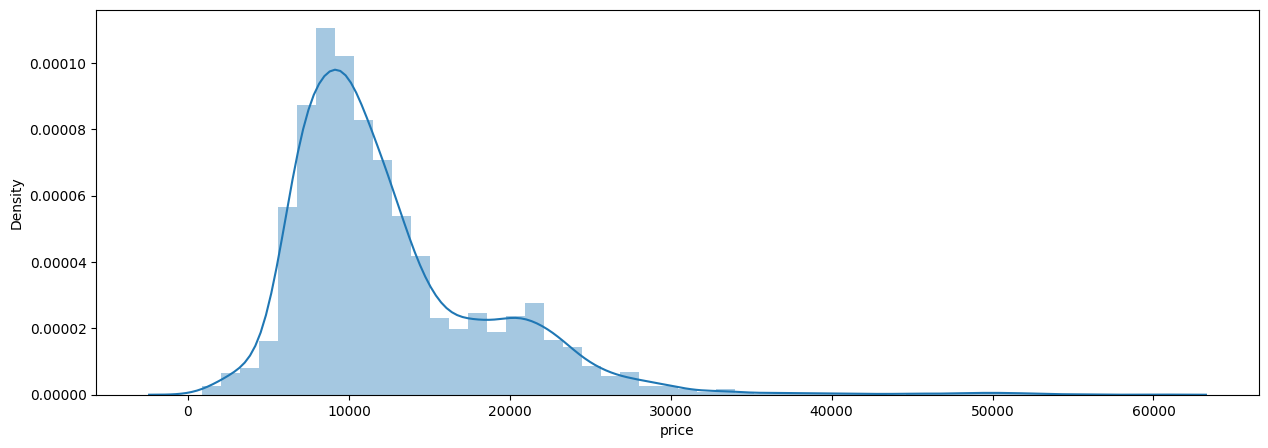

In [15]:
plt.figure(figsize=(15,5))
sns.distplot(df['price'])

In [16]:
features = ['jenis','year','transmission','mileage','fuelType','tax','mpg','engineSize']
x = df[features]
y = df['price']
x.shape, y.shape

((6738, 8), (6738,))

In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=70)

# Correctly access the shape property
print("Shape of y_test:", y_test.shape)

Shape of y_test: (1685,)


In [20]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Assuming 'df' is your DataFrame containing the data
features = ['jenis', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize']
x = df[features]
y = df['price']

# Label Encoding untuk variabel kategori
label_encoder = LabelEncoder()
x['jenis'] = label_encoder.fit_transform(x['jenis'])
x['transmission'] = label_encoder.fit_transform(x['transmission'])
x['fuelType'] = label_encoder.fit_transform(x['fuelType'])

# Melakukan split data menjadi training dan testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Membuat model regresi linier
lr = LinearRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)


C:\Users\roikh\AppData\Local\Temp\ipykernel_22972\3846917667.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['jenis'] = label_encoder.fit_transform(x['jenis'])
C:\Users\roikh\AppData\Local\Temp\ipykernel_22972\3846917667.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['transmission'] = label_encoder.fit_transform(x['transmission'])
C:\Users\roikh\AppData\Local\Temp\ipykernel_22972\3846917667.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [54]:
score = lr.score(x_test, y_test)
print('akurasi model regresi linier = ', score)

akurasi model regresi linier =  0.7848443243477564


In [55]:
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)

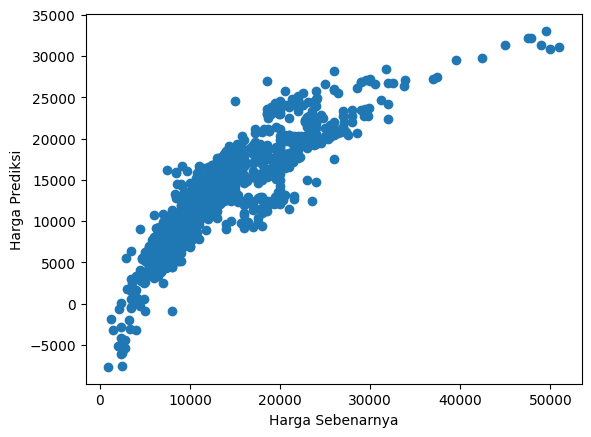

In [56]:
plt.scatter(y_test, pred)
plt.xlabel("Harga Sebenarnya")
plt.ylabel("Harga Prediksi")
plt.show()

Mean Squared Error (MSE): 3126829.219800541
R-squared (R2): 0.9265248252017368


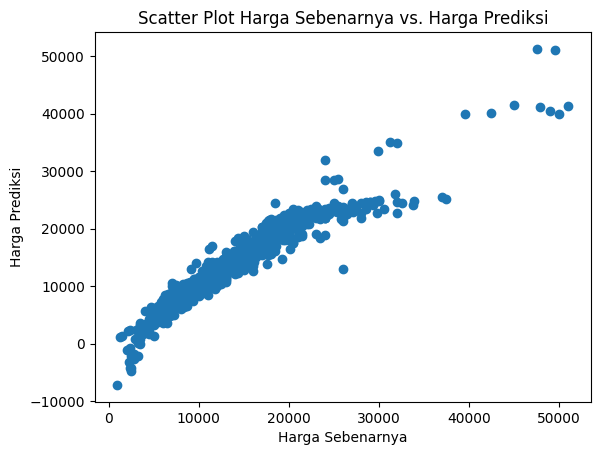

In [49]:
from sklearn.metrics import mean_squared_error, r2_score

# Melakukan prediksi pada data uji
y_pred = lr.predict(x_test)

# Menghitung Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Menghitung R-squared (R2)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2): {r2}")

# Visualisasi scatter plot
plt.scatter(y_test, y_pred)
plt.xlabel("Harga Sebenarnya")
plt.ylabel("Harga Prediksi")
plt.title("Scatter Plot Harga Sebenarnya vs. Harga Prediksi")
plt.show()


In [57]:
import pickle

filename = 'estimasi1_mobil.sav'
pickle.dump(lr,open(filename, 'wb'))